In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer

# Load Data

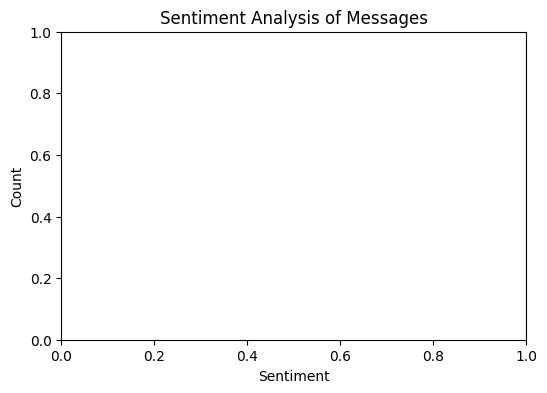

In [2]:
file_path = "office_group.txt"
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

data = []
pattern = r'^(\d{1,2}/\d{1,2}/\d{2,4}), (\d{1,2}:\d{2} [APM]{2}) - (.*?): (.*)$'
for line in lines:
    match = re.match(pattern, line.strip())
    if match:
        date, time, name, message = match.groups()
        data.append([date, time, name, message])

df = pd.DataFrame(data, columns=["Date", "Time", "Name", "Message"])

def sentimental_analysis(data, columnname='Message'):
    sid = SentimentIntensityAnalyzer()
    data.dropna(inplace=True)
    data['scores'] = data[columnname].apply(lambda text: sid.polarity_scores(text))
    data['compound'] = data['scores'].apply(lambda score: score['compound'])
    data['Sentiment'] = data['compound'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
    return data['Sentiment'].value_counts(), data

pos, data_Senti = sentimental_analysis(df, columnname='Message')

plt.figure(figsize=(6, 4))
sns.barplot(x=pos.index, y=pos.values, palette=['#2ca02c', '#d62728', '#1f77b4'])
plt.title('Sentiment Analysis of Messages')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Flirt Classification

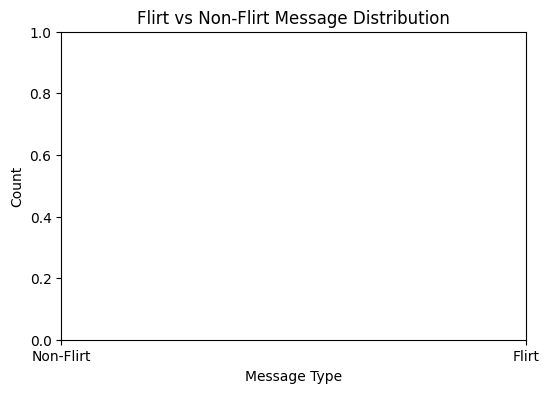

In [3]:
flirt_keywords = ["love", "baby", "miss you", "kiss", "heart", "beautiful"]
df['Flirt'] = df['Message'].apply(lambda x: any(word in x.lower() for word in flirt_keywords))
flirt_counts = df['Flirt'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=flirt_counts.index, y=flirt_counts.values, palette=['#d62728', '#2ca02c'])
plt.xticks(ticks=[0, 1], labels=['Non-Flirt', 'Flirt'])
plt.title('Flirt vs Non-Flirt Message Distribution')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

# Missed Call Analysis

In [4]:
missed_call_placeholder = 'Missed call'
missed_calls = df[df['Message'].str.contains(missed_call_placeholder, na=False)]
missed_call_counts = missed_calls['Name'].value_counts()

if not missed_call_counts.empty:
    plt.figure(figsize=(8, 5))
    missed_call_counts.plot(kind='bar', color='orange')
    plt.title('Missed Calls by User')
    plt.xlabel('User')
    plt.ylabel('Missed Call Count')
    plt.show()
else:
    print("No missed calls found in the dataset.")

No missed calls found in the dataset.
